In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# To Predict the right group for the customer

### Desired Accuracy 95%

In [170]:
df_train=pd.read_csv('/kaggle/input/multiclass-classification-problem/train.csv')


In [171]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,8058,8059,8060,8061,8062,8063,8064,8065,8066,8067
ID,462809,462643,466315,461735,462669,461319,460156,464347,465015,465176,...,460674,460132,463613,465231,463002,464018,464685,465406,467299,461879
Gender,Male,Female,Female,Male,Female,Male,Male,Female,Female,Female,...,Female,Male,Female,Male,Male,Male,Male,Female,Female,Male
Ever_Married,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,...,No,No,Yes,Yes,Yes,No,No,No,No,Yes
Age,22,38,67,67,40,56,32,33,61,55,...,31,39,48,65,41,22,35,33,27,37
Graduated,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes
Profession,Healthcare,Engineer,Engineer,Lawyer,Entertainment,Artist,Healthcare,Healthcare,Engineer,Artist,...,Entertainment,Healthcare,Artist,Artist,Artist,NaN,Executive,Healthcare,Healthcare,Executive
Work_Experience,1.0,NaN,1.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0
Spending_Score,Low,Average,Low,High,High,Average,Low,Low,Low,Average,...,Low,Low,Average,Average,High,Low,Low,Low,Low,Average
Family_Size,4.0,3.0,1.0,2.0,6.0,2.0,3.0,3.0,3.0,4.0,...,3.0,2.0,6.0,2.0,5.0,7.0,4.0,1.0,4.0,3.0
Var_1,Cat_4,Cat_4,Cat_6,Cat_6,Cat_6,Cat_6,Cat_6,Cat_6,Cat_7,Cat_6,...,Cat_3,Cat_6,Cat_6,Cat_6,Cat_6,Cat_1,Cat_4,Cat_6,Cat_6,Cat_4


In [172]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [173]:
df_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

# Gender

In [174]:
df_train['Gender'].value_counts()

Gender
Male      4417
Female    3651
Name: count, dtype: int64

In [175]:
df_train['Gender'].value_counts().to_dict()

{'Male': 4417, 'Female': 3651}

<Axes: xlabel='Gender', ylabel='count'>

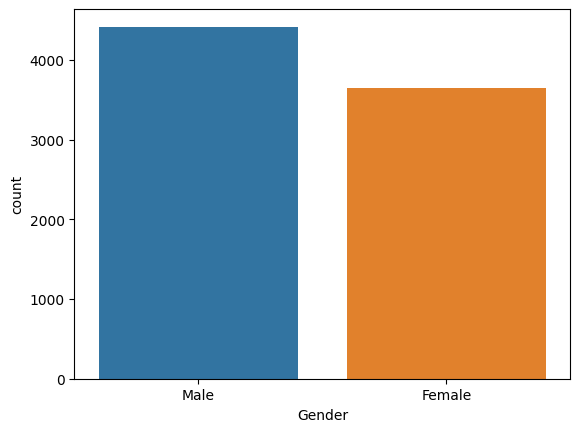

In [176]:
sns.countplot(x=df_train['Gender'])

In [177]:
df_train['Gender']=df_train['Gender'].replace({'Male': 1, 'Female': 0})

In [178]:
df_train['Gender'].value_counts()

Gender
1    4417
0    3651
Name: count, dtype: int64

# Ever_Married

In [179]:
df_train['Ever_Married'].value_counts()

Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

<Axes: xlabel='Ever_Married', ylabel='count'>

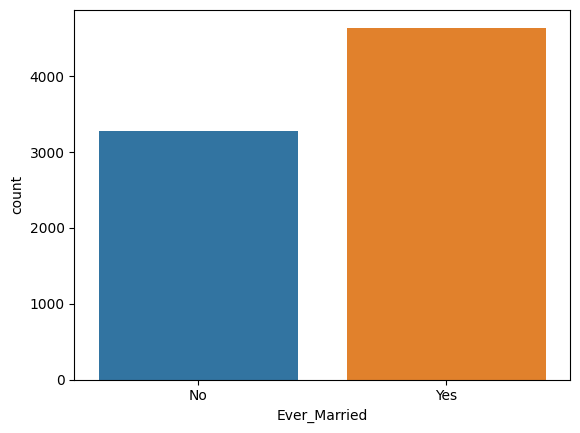

In [180]:
sns.countplot(x=df_train['Ever_Married'])

In [181]:
df_train['Ever_Married'].value_counts().to_dict()

{'Yes': 4643, 'No': 3285}

### % of nan values in df_train['Ever_Married']

In [182]:
df_train['Ever_Married'].isna().sum()*100/len(df_train)

1.7352503718393655

In [183]:
df_train['Ever_Married']=df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode()[0])

In [184]:
df_train['Ever_Married'].isna().sum()*100/len(df_train)

0.0

In [185]:
df_train['Ever_Married'].replace({'Yes': 1, 'No': 0},inplace=True)

<Axes: xlabel='Ever_Married', ylabel='count'>

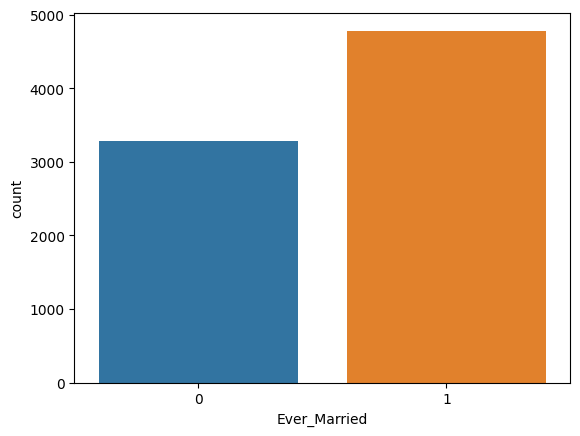

In [186]:
sns.countplot(x=df_train['Ever_Married'])

# Age

In [187]:
df_train['Age'].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88])

In [188]:
df_train['Age'].nunique()

67

In [189]:
df_train['Age'].isna().sum()

0

<Axes: xlabel='Age', ylabel='Age'>

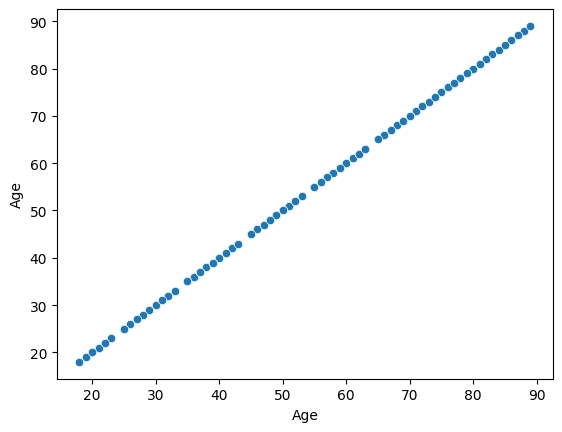

In [190]:
sns.scatterplot(x=df_train['Age'],y=df_train['Age'])

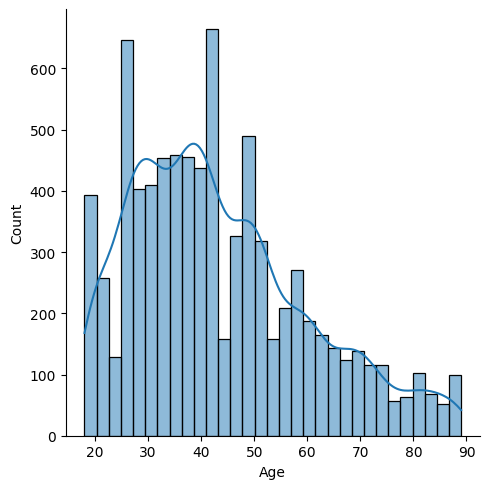

In [191]:
sns.displot(x=df_train['Age'],kde=True)

<Axes: ylabel='Density'>

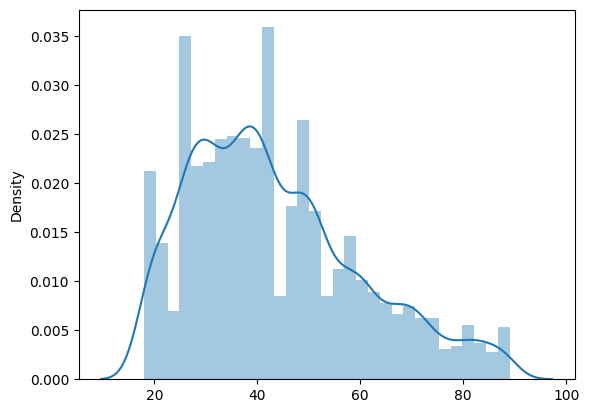

In [192]:
sns.distplot(x=df_train['Age'],kde=True)

# Graduated

In [193]:
df_train['Graduated'].value_counts().to_dict()

{'Yes': 4968, 'No': 3022}

### percentage of nan values in df_train['Graduated']

In [194]:
df_train['Graduated'].isna().sum()*100/len(df_train)

0.9667823500247893

In [195]:
df_train['Graduated'].fillna(df_train['Graduated'].mode()[0],inplace=True)

<Axes: xlabel='Graduated', ylabel='count'>

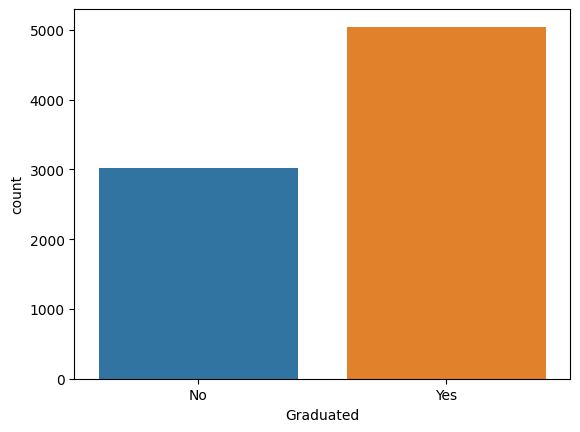

In [196]:
sns.countplot(x=df_train['Graduated'])

In [197]:
df_train['Graduated'].replace({'Yes': 0, 'No': 1},inplace=True)

<Axes: xlabel='Graduated', ylabel='count'>

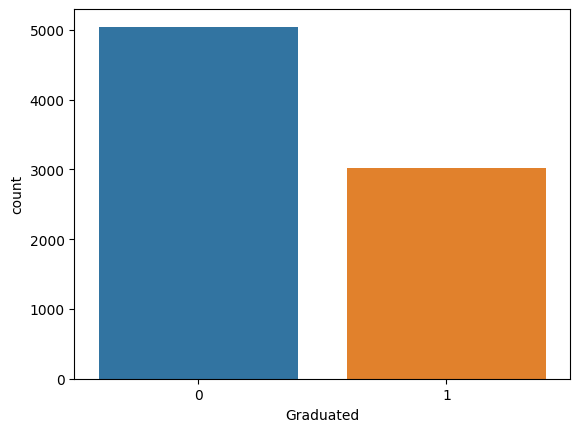

In [198]:
sns.countplot(x=df_train['Graduated'])

# Profession

In [199]:
df_train['Profession'].value_counts().to_dict()

{'Artist': 2516,
 'Healthcare': 1332,
 'Entertainment': 949,
 'Engineer': 699,
 'Doctor': 688,
 'Lawyer': 623,
 'Executive': 599,
 'Marketing': 292,
 'Homemaker': 246}

<Axes: xlabel='Profession', ylabel='count'>

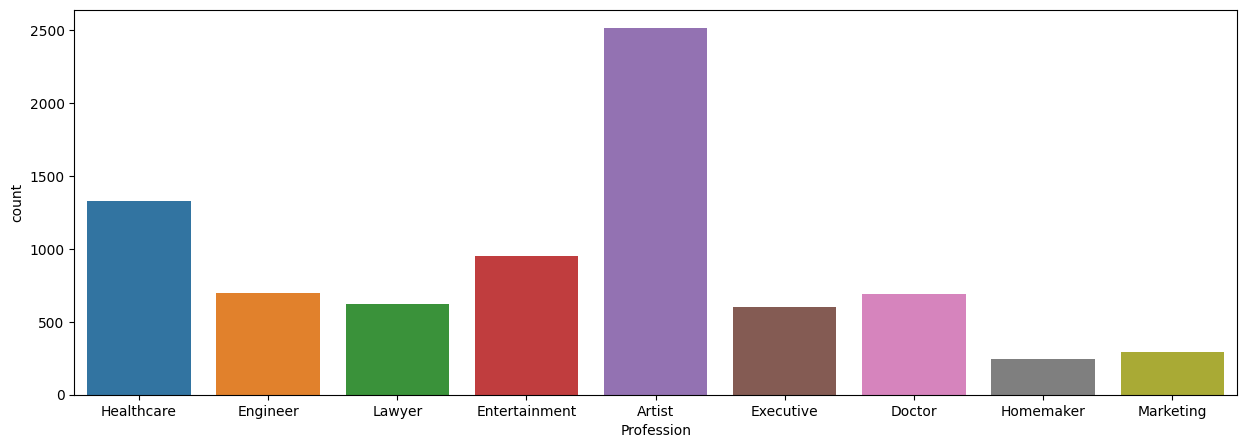

In [200]:
plt.figure(figsize=(15,5))
sns.countplot(x=df_train['Profession'])

In [201]:
df_train['Profession'].isna().sum()*100/len(df_train)

1.5369360436291521

In [202]:
df_train['Profession'].fillna('Other',inplace=True)

In [203]:
df_train['Profession'].value_counts().to_dict()

{'Artist': 2516,
 'Healthcare': 1332,
 'Entertainment': 949,
 'Engineer': 699,
 'Doctor': 688,
 'Lawyer': 623,
 'Executive': 599,
 'Marketing': 292,
 'Homemaker': 246,
 'Other': 124}

In [204]:
df_train['Profession'].isna().sum()*100/len(df_train)

0.0

# One hot Encoding

In [205]:
df_prof=pd.get_dummies(df_train['Profession'],drop_first=True)

In [206]:
df_prof

,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Other
0,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8063,False,False,False,False,False,False,False,False,True
8064,False,False,False,True,False,False,False,False,False
8065,False,False,False,False,True,False,False,False,False
8066,False,False,False,False,True,False,False,False,False


# Work_Experience

In [207]:
df_train['Work_Experience'].value_counts()

Work_Experience
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: count, dtype: int64

In [208]:
df_train['Work_Experience'].isna().sum()*100/len(df_train)

10.275161130391671

<Axes: xlabel='Work_Experience', ylabel='Var_1'>

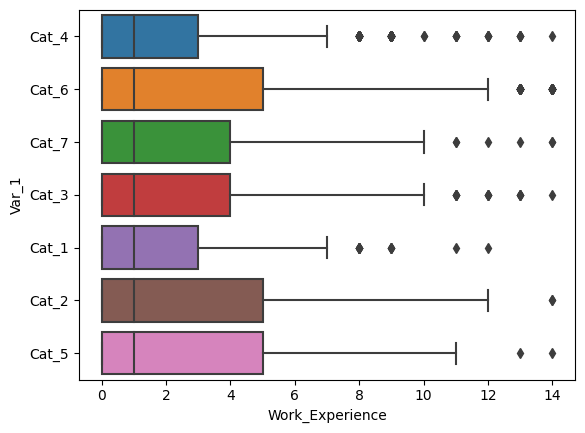

In [209]:
sns.boxplot(x=df_train['Work_Experience'],y=df_train['Var_1'])

In [210]:
df_train['Work_Experience'].fillna(df_train['Work_Experience'].mode()[0],inplace=True)

In [211]:
df_train['Work_Experience'].isna().sum()*100/len(df_train)

0.0

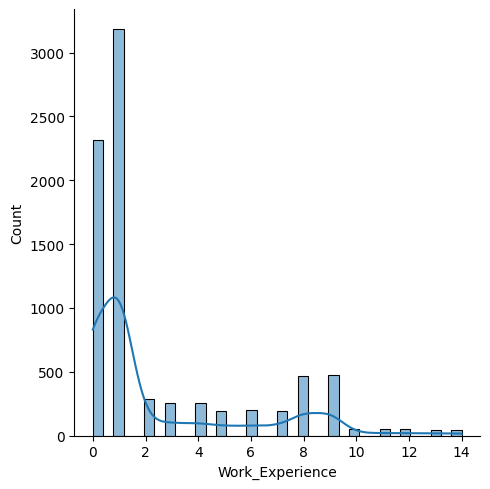

In [212]:
sns.displot(x=df_train['Work_Experience'],kde=True)

# Spending_Score 

In [213]:
df_train['Spending_Score'].isna().sum()

0

In [214]:
df_train['Spending_Score'].value_counts().to_dict()

{'Low': 4878, 'Average': 1974, 'High': 1216}

In [215]:
df_train['Spending_Score'].replace({'Low': 0, 'Average': 1, 'High': 2},inplace=True)

In [216]:
df_train['Spending_Score'].value_counts().to_dict()

{0: 4878, 1: 1974, 2: 1216}

<Axes: xlabel='Spending_Score', ylabel='count'>

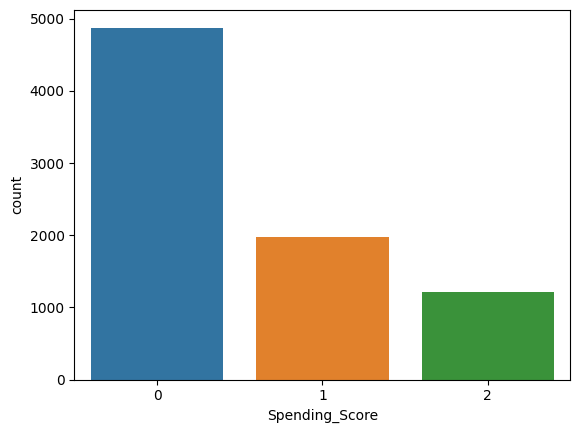

In [217]:
sns.countplot(x=df_train['Spending_Score'])

# Family_Size      

In [218]:
df_train['Family_Size'].value_counts()

Family_Size
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: count, dtype: int64

In [219]:
df_train['Family_Size'].isna().sum()*100/len(df_train)

4.152206246901339

<Axes: ylabel='count'>

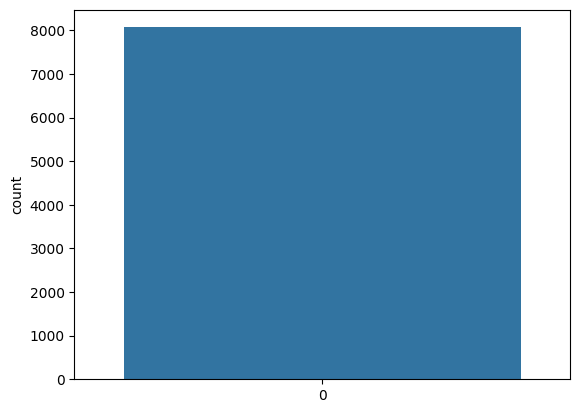

In [220]:
sns.countplot(df_train['Family_Size'])

In [221]:
df_train['Family_Size']=df_train['Family_Size'].fillna(df_train['Family_Size'].mode()[0])

In [222]:
df_train['Family_Size'].isna().sum()*100/len(df_train)

0.0

# Var_1

In [223]:
df_train['Var_1'].value_counts()

Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64

In [224]:
df_train['Var_1'].isna().sum()*100/len(df_train)

0.9419930589985126

<Axes: xlabel='Var_1', ylabel='count'>

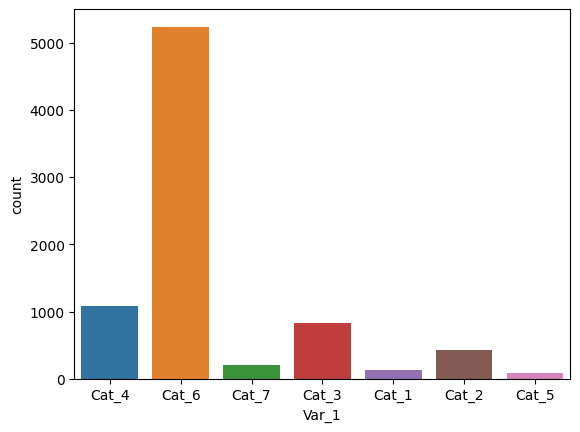

In [225]:
sns.countplot(x=df_train['Var_1'])

In [226]:
df_train.dropna(inplace=True,axis=0)

In [227]:
df_train['Var_1'].isna().sum()*100/len(df_train)

0.0

In [228]:
len(df_train)

7992

In [229]:
df_train['Var_1'].value_counts().to_dict()

{'Cat_6': 5238,
 'Cat_4': 1089,
 'Cat_3': 822,
 'Cat_2': 422,
 'Cat_7': 203,
 'Cat_1': 133,
 'Cat_5': 85}

In [230]:
df_train['Var_1'].replace({'Cat_6': 6,
 'Cat_4': 4,
 'Cat_3': 3,
 'Cat_2': 2,
 'Cat_7': 7,
 'Cat_1': 1,
 'Cat_5': 5},inplace=True)

# Segmentation

In [231]:
df_train['Segmentation'].value_counts().to_dict()

{'D': 2245, 'A': 1953, 'C': 1949, 'B': 1845}

In [232]:
df_train['Segmentation'].replace({'D': 3, 'A': 0, 'C': 2, 'B': 1},inplace=True)

In [233]:
df_train['Segmentation'].value_counts().to_dict()

{3: 2245, 0: 1953, 2: 1949, 1: 1845}

In [234]:
df_1=df_train.drop(['ID','Segmentation','Profession'],axis=1)


In [235]:
x=pd.concat([df_1,df_prof],axis=1)
x.dropna(axis=0,inplace=True)

In [236]:
y=df_train['Segmentation']

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, multilabel_confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,stratify=y,test_size=0.2)

In [239]:
x_train

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Other
6857,1.0,1.0,45.0,0.0,0.0,1.0,4.0,6.0,False,False,False,False,False,False,False,False,False
4207,1.0,1.0,80.0,1.0,1.0,0.0,2.0,6.0,False,False,False,False,False,False,False,False,False
4631,1.0,1.0,36.0,1.0,1.0,2.0,6.0,4.0,False,False,False,True,False,False,False,False,False
6018,0.0,0.0,62.0,0.0,0.0,0.0,1.0,6.0,False,True,False,False,False,False,False,False,False
5082,0.0,1.0,37.0,1.0,1.0,0.0,3.0,6.0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.0,41.0,0.0,9.0,0.0,1.0,4.0,True,False,False,False,False,False,False,False,False
6488,1.0,0.0,19.0,1.0,1.0,0.0,3.0,4.0,False,False,False,False,True,False,False,False,False
3391,1.0,0.0,21.0,1.0,1.0,0.0,4.0,3.0,False,False,False,False,True,False,False,False,False
5159,0.0,0.0,28.0,1.0,0.0,0.0,1.0,4.0,False,True,False,False,False,False,False,False,False


In [246]:
def Model_Evaluation(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print()
    print('Testing Data Evaluation')
    accuracy=accuracy_score(y_test,y_predict)
    print(f'accuracy_score: {accuracy}')
    multilabel=multilabel_confusion_matrix(y_test,y_predict)
    print(f'multilabel_confusion_matrix: {multilabel}')
    
    
    y_predict_train=model.predict(x_train)
    print()
    print()
    print('Training Data Evaluation')
    accuracy=accuracy_score(y_train,y_predict_train)
    print(f'accuracy_score: {accuracy}')
    multilabel=multilabel_confusion_matrix(y_train,y_predict_train)
    print(f'multilabel_confusion_matrix: {multilabel}')   

In [247]:
Model_Evaluation(LogisticRegression(max_iter=150,multi_class='ovr'))


Testing Data Evaluation
accuracy_score: 0.5215759849906192
multilabel_confusion_matrix: [[[ 952  256]
  [ 184  207]]

 [[1165   65]
  [ 314   55]]

 [[ 925  284]
  [ 135  255]]

 [[ 990  160]
  [ 132  317]]]


Training Data Evaluation
accuracy_score: 0.5108712654465822
multilabel_confusion_matrix: [[[3800 1031]
  [ 822  740]]

 [[4611  306]
  [1255  221]]

 [[3757 1077]
  [ 527 1032]]

 [[3884  713]
  [ 523 1273]]]


In [251]:
Model_Evaluation(DecisionTreeClassifier())


Testing Data Evaluation
accuracy_score: 0.42151344590368983
multilabel_confusion_matrix: [[[923 285]
  [240 151]]

 [[962 268]
  [246 123]]

 [[995 214]
  [231 159]]

 [[992 158]
  [208 241]]]


Training Data Evaluation
accuracy_score: 0.9601126231816048
multilabel_confusion_matrix: [[[4719  112]
  [  13 1549]]

 [[4820   97]
  [  72 1404]]

 [[4795   39]
  [ 113 1446]]

 [[4590    7]
  [  57 1739]]]


In [249]:
Model_Evaluation(RandomForestClassifier(criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=55))


Testing Data Evaluation
accuracy_score: 0.5053158223889931
multilabel_confusion_matrix: [[[ 942  266]
  [ 190  201]]

 [[1105  125]
  [ 301   68]]

 [[ 995  214]
  [ 170  220]]

 [[ 964  186]
  [ 130  319]]]


Training Data Evaluation
accuracy_score: 0.522915689034882
multilabel_confusion_matrix: [[[3874  957]
  [ 825  737]]

 [[4435  482]
  [1154  322]]

 [[4024  810]
  [ 614  945]]

 [[3796  801]
  [ 457 1339]]]


In [250]:
Model_Evaluation(XGBClassifier())


Testing Data Evaluation
accuracy_score: 0.5003126954346466
multilabel_confusion_matrix: [[[ 968  240]
  [ 207  184]]

 [[1031  199]
  [ 256  113]]

 [[1025  184]
  [ 180  210]]

 [[ 974  176]
  [ 156  293]]]


Training Data Evaluation
accuracy_score: 0.7677146879399342
multilabel_confusion_matrix: [[[4417  414]
  [ 404 1158]]

 [[4584  333]
  [ 544  932]]

 [[4396  438]
  [ 319 1240]]

 [[4297  300]
  [ 218 1578]]]


# Hyper Parameter Tuneing

In [252]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [255]:
model=RandomForestClassifier()
hyp={'n_estimators': np.arange(10,200,10),
        'criterion': ['gini','entropy'],
    'max_depth': np.arange(2,10),
    'min_samples_split': np.arange(2,20),
    'min_samples_leaf': np.arange(2,10)
}

rscv=RandomizedSearchCV(model,hyp,cv=5)
Model_Evaluation(rscv)


Testing Data Evaluation
accuracy_score: 0.5228267667292058
multilabel_confusion_matrix: [[[ 953  255]
  [ 179  212]]

 [[1067  163]
  [ 266  103]]

 [[1026  183]
  [ 176  214]]

 [[ 988  162]
  [ 142  307]]]


Training Data Evaluation
accuracy_score: 0.5740653840137651
multilabel_confusion_matrix: [[[3998  833]
  [ 695  867]]

 [[4357  560]
  [ 945  531]]

 [[4178  656]
  [ 624  935]]

 [[3923  674]
  [ 459 1337]]]
